In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-09-12 15:09:33.782162: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 15:09:33.785345: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 15:09:33.793571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 15:09:33.807282: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 15:09:33.811242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 15:09:33.822274: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# CREATING DATAFRAMES OF CSV FILES
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39838,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8662,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30696,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30621,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20284,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


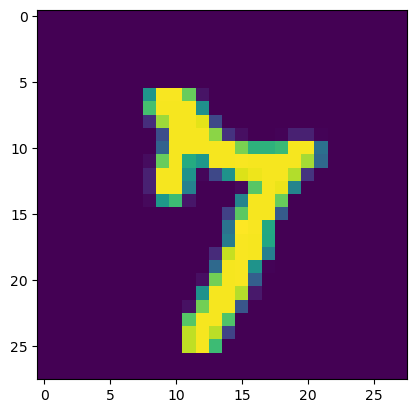

In [4]:
# VISUALIZING WRITTEN DIGIT
num1 = np.array(train.iloc[18302,1:]).reshape(28,28)
plt.imshow(num1)

(array([700.,   2.,   2.,  14.,   2.,   1.,   4.,   8.,   9.,  42.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

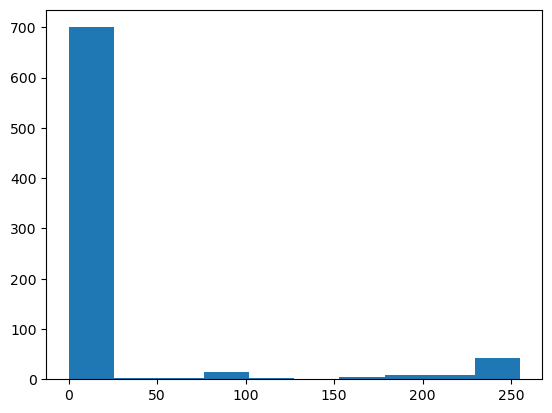

In [5]:
num2 = train.iloc[0,1:]
plt.hist(num2)

In [6]:
num2.unique()

array([  0, 188, 255,  94, 191, 250, 253,  93, 123, 248, 167,  10,  80,
       247, 208,  13,  29, 207, 235,  77,  54, 209,  88, 254, 238, 170,
        17,  23, 210, 159,  16, 240,  81,  27,  20, 206, 198,   7, 168,
       196, 203,  76,  22, 245, 103,  89, 195,  25,  15, 220, 251, 131,
       214, 218,  95])

In [7]:
num2.max()

255

In [8]:
num2.min()

0

In [9]:
null_val=train.isnull().sum()
null_val

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Feature Engineering

In [11]:
# CREATING TRAINING AND TESTING DATA
x = np.array(train)
y = np.array(test)

x_train = x[:,1:]
y_train = x[:,0]
x_test = y

In [12]:
# RESHAPING TRAINING DATA TO FIT IN IMAGE DATA GENERATOR
x_train=x_train.reshape(-1,28,28,1)

In [13]:
# AUGMANTATING TRAINING DATA (OPTIONAL)
data_gen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
)

data_gen.fit(x_train)

In [14]:
# RESHAPING DATA BACK TO ORIGINAL
x_train = x_train.reshape(-1,784)
x_train.shape

(42000, 784)

## Model

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
# PREDICTING RANDOMLY FROM TEST DATA, SAY 97th DATA
int(knn.predict(x_test[96].reshape(1, -1)))

/tmp/ipykernel_23828/3040454651.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[96].reshape(1, -1)))


3

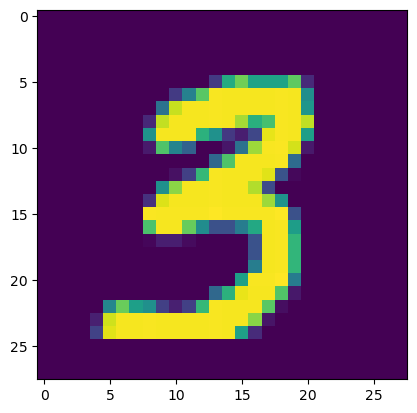

In [18]:
num = np.array(test.iloc[96,:]).reshape(28,28)
plt.imshow(num)